# Рубежный контроль по курсу "Методы машинного обучения"
## Студентка ИУ5-21М Курганова Александра
### Вариант №3 (задача №3, задача №23) 
#### + для пары произвольных колонок данных построить график "Диаграмма рассеяния"


In [250]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/Colab Notebooks/ммо/rk1"

Mounted at /content/drive


In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
dataset = pd.read_csv(path+'/telecom_users.csv')

In [253]:
dataset.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [254]:
dataset.shape

(5986, 22)

### Задача №3
Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "weight of evidence (WoE) encoding".

In [255]:
data_features = list(zip(
# признаки
[i for i in dataset.columns],
zip(
    # типы колонок
    [str(i) for i in dataset.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in dataset.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Unnamed: 0', ('int64', 0)),
 ('customerID', ('object', 0)),
 ('gender', ('object', 0)),
 ('SeniorCitizen', ('int64', 0)),
 ('Partner', ('object', 0)),
 ('Dependents', ('object', 0)),
 ('tenure', ('int64', 0)),
 ('PhoneService', ('object', 0)),
 ('MultipleLines', ('object', 0)),
 ('InternetService', ('object', 0)),
 ('OnlineSecurity', ('object', 0)),
 ('OnlineBackup', ('object', 0)),
 ('DeviceProtection', ('object', 0)),
 ('TechSupport', ('object', 0)),
 ('StreamingTV', ('object', 0)),
 ('StreamingMovies', ('object', 0)),
 ('Contract', ('object', 0)),
 ('PaperlessBilling', ('object', 0)),
 ('PaymentMethod', ('object', 0)),
 ('MonthlyCharges', ('float64', 0)),
 ('TotalCharges', ('object', 0)),
 ('Churn', ('object', 0))]

In [256]:
filtered_columns = ['SeniorCitizen', 'gender', 'tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
data = dataset[filtered_columns]
data.head()

,SeniorCitizen,gender,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Male,72,No,Two year,Credit card (automatic),24.10,1734.65
1,0,Female,44,Fiber optic,Month-to-month,Credit card (automatic),88.15,3973.2
2,1,Female,38,Fiber optic,Month-to-month,Bank transfer (automatic),74.95,2869.85
3,0,Male,4,DSL,Month-to-month,Electronic check,55.90,238.5
4,0,Male,2,DSL,Month-to-month,Electronic check,53.45,119.5


In [257]:
!pip install category_encoders
from category_encoders.woe import WOEEncoder as ce_WOEEncoder

In [258]:
ce_WOEEncoder1 = ce_WOEEncoder()
data_WOE_ENC = ce_WOEEncoder1.fit_transform(data[data.columns.difference(['SeniorCitizen'])], data['SeniorCitizen'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [259]:
data['InternetService'].unique()

array(['No', 'Fiber optic', 'DSL'], dtype=object)

In [260]:
data_WOE_ENC['InternetService'].unique()

array([-1.74767744,  0.64238762, -0.47283042])

In [261]:
def check_woe_encoding(field):
    data_ones = data[data['SeniorCitizen'] == 1].shape[0]
    data_zeros = data[data['SeniorCitizen'] == 0].shape[0]
    
    for s in data[field].unique():
        data_filter = data[data[field]==s]
        if data_filter.shape[0] > 0:
            
            filter_data_ones = data_filter[data_filter['SeniorCitizen'] == 1].shape[0]
            filter_data_zeros = data_filter[data_filter['SeniorCitizen'] == 0].shape[0]

            good = filter_data_ones / data_ones
            bad = filter_data_zeros / data_zeros
            
            woe = np.log(good/bad)
            print(s, '-' , woe)

In [262]:
check_woe_encoding('InternetService')

No - -1.769305385118782
Fiber optic - 0.6431579890425195
DSL - -0.47513390020823026


### Задача №23
Для набора данных для одного (произвольного) числового признака проведите обнаружение и удаление выбросов на основе правила трех сигм.

In [263]:
dataset2 = pd.read_csv(path+'/Video_Games_Sales.csv')

In [264]:
dataset2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
filtered2_columns = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Other_Sales']
data2 = dataset2[filtered2_columns]
data2.head()

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,82.53,8.45
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,40.24,0.77
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,35.52,3.29
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,32.77,2.95
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,31.37,1.00


In [266]:
x_col_list = ['JP_Sales']

In [267]:
# Функция построения графиков - ящики с усами
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

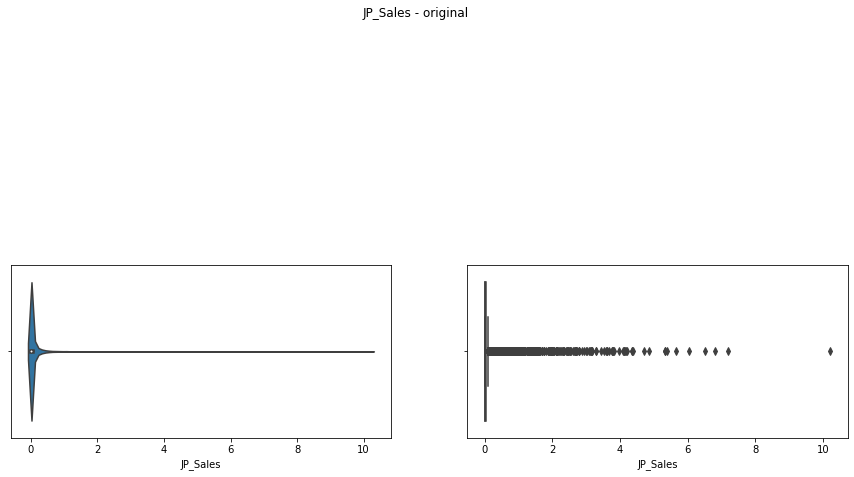

In [268]:
diagnostic_plots(dataset2, 'JP_Sales', 'JP_Sales - original')

In [269]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1

In [270]:
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

In [271]:
data2.shape

(16719, 7)

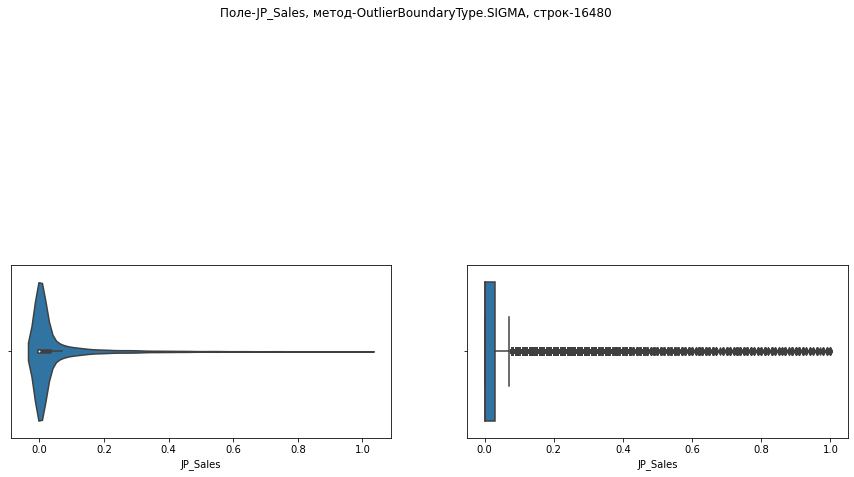

In [272]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data2, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data2[col] > upper_boundary, True, 
                                 np.where(data2[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data2.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### График "Диаграмма рассеяния"
#### используя датасет с видео играми

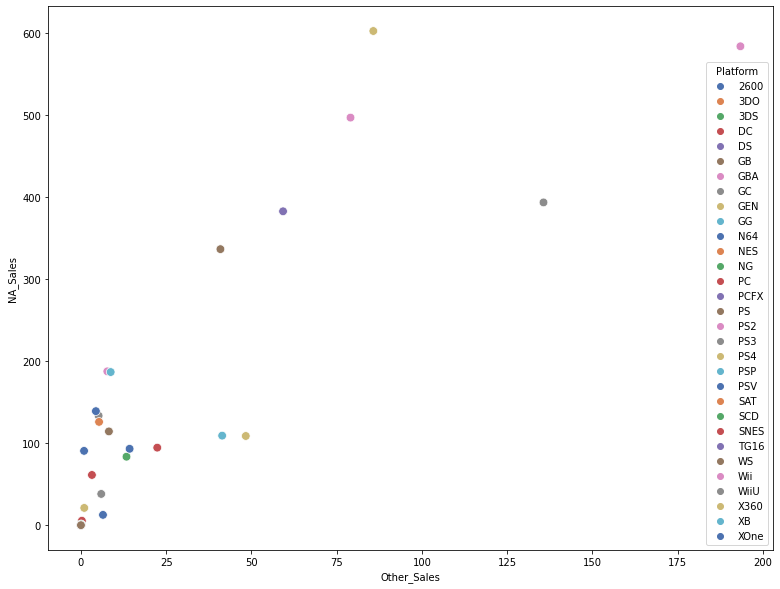

In [346]:
sales_data_year = data2.groupby(by="Platform").sum()
plt.figure(figsize=(13,10))
ax = sns.scatterplot(x=sales_data_year["Other_Sales"], y=sales_data_year["NA_Sales"], data=sales_data_year, s=75, hue="Platform", palette="deep")
plt.show()